# Student Exam Score Prediction using Regression
### Internship Project — Celebal Technologies
#### By Manish Kumar

###  Project Objective:
This project aims to predict students' exam scores based on features such as the number of hours studied, previous exam scores, and attendance. Regression techniques will be used to build a model that estimates the exam score of a student given these input features. The project can provide insights into factors influencing student performance and help educators identify students who may need additional support.


Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Step 2: Load Dataset

In [2]:
df = pd.read_csv("student_exam_scores_dataset.csv")


In [3]:
df.head()

,Hours_Studied,Previous_Score,Attendance,Exam_Score
0,5.993428,65.366810,69.055723,40.202845
1,4.723471,68.411768,79.006250,34.075689
2,6.295377,76.245769,85.052437,47.379936
3,8.046060,75.807031,85.469806,50.637290
4,4.531693,39.334959,80.499345,32.233378


Step 3: Data Overview

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours_Studied   200 non-null    float64
 1   Previous_Score  200 non-null    float64
 2   Attendance      200 non-null    float64
 3   Exam_Score      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [5]:
print(df.describe())

       Hours_Studied  Previous_Score  Attendance  Exam_Score
count     200.000000      200.000000  200.000000  200.000000
mean        4.917454       61.199068   83.877000   37.638680
std         1.852426       14.514454    9.385808    6.820137
min         0.000000       11.380990   60.283555   17.605863
25%         3.589745       50.912437   77.061216   33.608788
50%         4.991616       61.182590   84.224001   38.013352
75%         6.001705       70.308467   90.720882   42.262533
max        10.000000      100.000000  100.000000   58.551659


Step 4: EDA

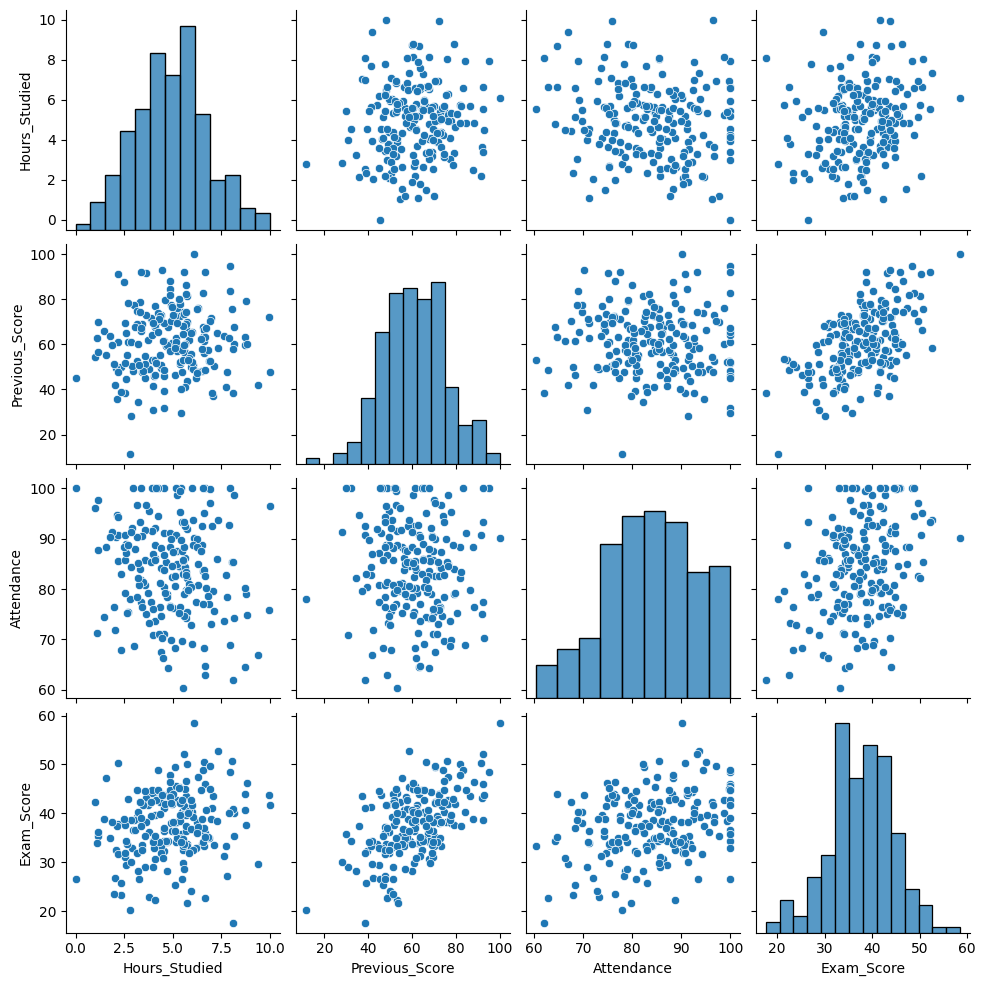

In [6]:
sns.pairplot(df)
plt.show()


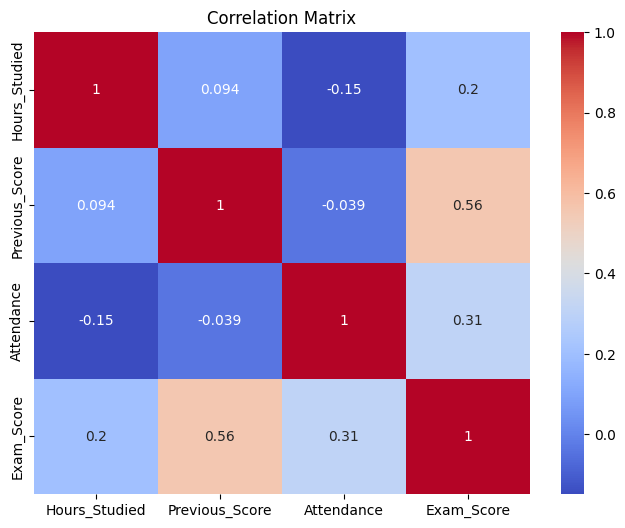

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Step 5: Feature and Target Setup

In [8]:
X = df[['Hours_Studied', 'Previous_Score', 'Attendance']]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 6: Linear Regression

In [9]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

print("Linear Regression:")
print("R² Score:", r2_score(y_test, lr_preds))
print("MSE:", mean_squared_error(y_test, lr_preds))
print("MAE:", mean_absolute_error(y_test, lr_preds))

Linear Regression:
R² Score: 0.576879651334891
MSE: 21.083698309373567
MAE: 3.7227408095782577


Step 7: Random Forest Regressor

In [10]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Random Forest Regressor:")
print("R² Score:", r2_score(y_test, rf_preds))
print("MSE:", mean_squared_error(y_test, rf_preds))
print("MAE:", mean_absolute_error(y_test, rf_preds))

Random Forest Regressor:
R² Score: 0.4632395062628658
MSE: 26.746282352166496
MAE: 4.051738243997596


Step 8: Support Vector Regressor

In [11]:
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_preds = svr_model.predict(X_test)

print("Support Vector Regressor:")
print("R² Score:", r2_score(y_test, svr_preds))
print("MSE:", mean_squared_error(y_test, svr_preds))
print("MAE:", mean_absolute_error(y_test, svr_preds))

Support Vector Regressor:
R² Score: 0.42970816925350486
MSE: 28.417118074545918
MAE: 4.1130237595509405


Step 9: Evaluate & Compare All Models in Code

In [12]:
results = {
    "Linear Regression": {
        "R2": r2_score(y_test, lr_preds),
        "MSE": mean_squared_error(y_test, lr_preds),
        "MAE": mean_absolute_error(y_test, lr_preds)
    },
    "Random Forest": {
        "R2": r2_score(y_test, rf_preds),
        "MSE": mean_squared_error(y_test, rf_preds),
        "MAE": mean_absolute_error(y_test, rf_preds)
    },
    "SVR": {
        "R2": r2_score(y_test, svr_preds),
        "MSE": mean_squared_error(y_test, svr_preds),
        "MAE": mean_absolute_error(y_test, svr_preds)
    }
}


results_df = pd.DataFrame(results).T
print(" Model Comparison:")
print(results_df)

best_model = results_df['R2'].idxmax()
print(f"\nBest Model based on R² Score: {best_model}")


 Model Comparison:
                         R2        MSE       MAE
Linear Regression  0.576880  21.083698  3.722741
Random Forest      0.463240  26.746282  4.051738
SVR                0.429708  28.417118  4.113024

Best Model based on R² Score: Linear Regression


Step 10: Comparison Plot

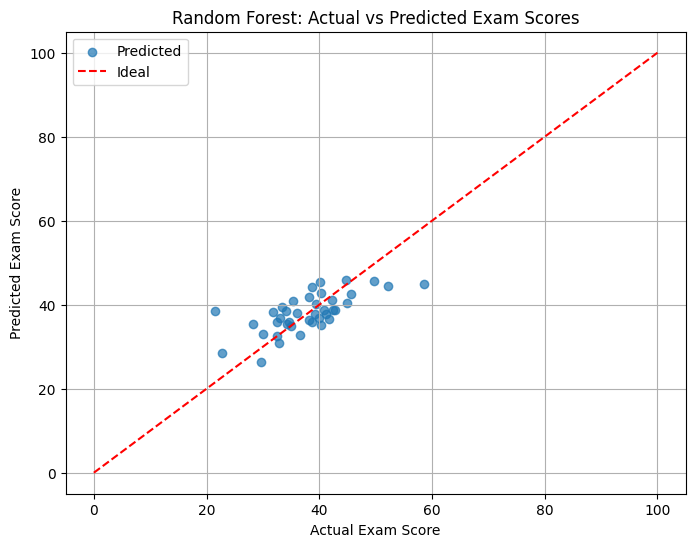

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_preds, alpha=0.7, label="Predicted")
plt.plot([0, 100], [0, 100], 'r--', label="Ideal")
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Random Forest: Actual vs Predicted Exam Scores")
plt.legend()
plt.grid(True)
plt.show()

## Conclusion
After testing all models, **Linear Regression performed the best** with the highest R² score and lowest error values.  
It showed that the relationship between input features and exam scores is mostly linear

## Final Result:
Best Model: Linear Regression.

It's simple, easy to understand, and performed the best on this dataset.

This project helped me understand how different factors affect student performance and how machine learning can be used in the education field.